# Decision Tree TEST

### Dataframe creation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [3]:
df = pd.read_csv("train_cleaned.csv")
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy


In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [6]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

### Preparing the Test Dataset

In [7]:
test = pd.read_csv("test_cleaned.csv")
test.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,0.1040,0.00607,0.000000,0.2610,0.668,110.584,4.0,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,0.0596,0.28100,0.827000,0.0992,0.140,171.752,4.0,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,0.0326,0.09460,0.000005,0.1390,0.285,90.024,4.0,indian
3,いじわるなハロー,247040,False,25,Perfume,Cling Cling,0.500,0.958,0,-1.695,0.0350,0.00817,0.318000,0.7320,0.955,130.059,4.0,j-idol
4,Hit The Ceiling,208120,False,0,Audio Bullys,Ego War,0.802,0.684,1,-8.839,0.1230,0.00181,0.010200,0.2360,0.637,130.022,4.0,breakbeat


In [8]:
test = test.replace({"explicit": {False:0, True:1}})

In [9]:
X_train = df[attributes].values
y_train = df["genre"]

In [10]:
X_test = test[attributes].values
y_test = test["genre"]

### Decision Tree Classifier Pre-Pruning parameters

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

min_samples_leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Decision Tree

In [12]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0005, criterion='gini', min_samples_leaf=20, max_depth=12, min_samples_split=50)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005, max_depth=12, min_samples_leaf=20,
                       min_samples_split=50, random_state=0)

In [13]:
y_train_pred = dtp.predict(X_train)
y_test_pred = dtp.predict(X_test)

In [14]:
print(classification_report(y_train, y_train_pred))

               precision    recall  f1-score   support

     afrobeat       0.33      0.20      0.25       750
  black-metal       0.70      0.64      0.67       750
    bluegrass       0.49      0.43      0.46       750
       brazil       0.24      0.16      0.19       750
    breakbeat       0.37      0.14      0.20       750
chicago-house       0.50      0.55      0.53       750
       disney       0.39      0.39      0.39       750
        forro       0.49      0.52      0.51       750
        happy       0.33      0.59      0.43       750
          idm       0.28      0.32      0.30       750
       indian       0.23      0.20      0.21       750
   industrial       0.37      0.41      0.39       750
      iranian       0.45      0.38      0.41       750
      j-dance       0.36      0.57      0.44       750
       j-idol       0.45      0.48      0.46       750
     mandopop       0.37      0.55      0.44       750
        sleep       0.85      0.72      0.78       750
      spa

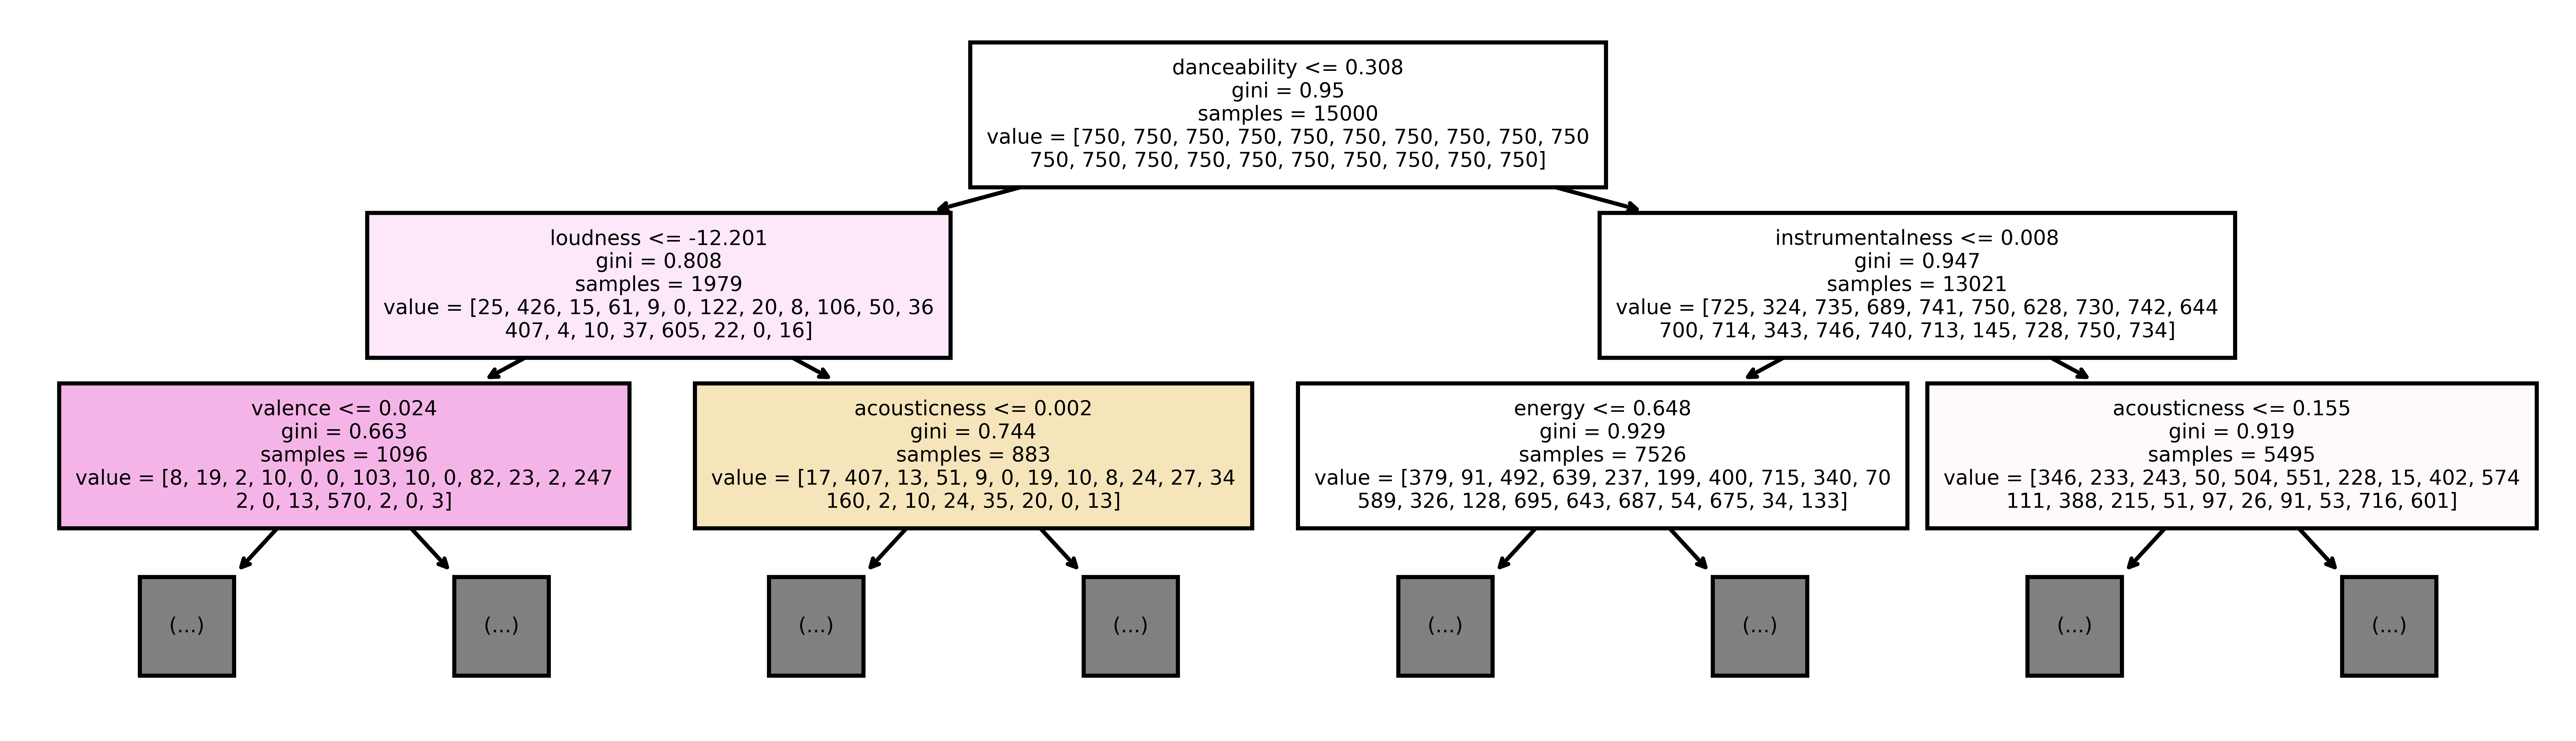

In [42]:
plt.figure(figsize=(11, 3), dpi=1200)
plt.title('Decision Tree for Genres (Final Evaluation)')
plot_tree(dtp, max_depth=2, feature_names=attributes, filled=True, fontsize=5)
plt.savefig('Decision tree FE PostP.png')
plt.show()

### Scores and Heatmap

In [16]:
%%time
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.4216666666666667
Train F1-score [0.24561404 0.67037552 0.45759088 0.1888     0.20483092 0.52678571
 0.39030956 0.50550875 0.42553191 0.30062112 0.21218638 0.38938053
 0.41324694 0.43820225 0.46283129 0.442421   0.78034682 0.16811955
 0.69783198 0.40567613]

Test Accuracy 0.3822
Test F1-score [0.16541353 0.61637931 0.38495575 0.18055556 0.1852861  0.56420233
 0.34095634 0.44444444 0.36546763 0.24911032 0.1986755  0.29902913
 0.36016949 0.43710692 0.37878788 0.41057543 0.72283814 0.15230461
 0.68273092 0.41102757]
CPU times: total: 31.2 ms
Wall time: 92.7 ms


In [17]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.22      0.13      0.17       250
  black-metal       0.67      0.57      0.62       250
    bluegrass       0.43      0.35      0.38       250
       brazil       0.21      0.16      0.18       250
    breakbeat       0.29      0.14      0.19       250
chicago-house       0.55      0.58      0.56       250
       disney       0.35      0.33      0.34       250
        forro       0.41      0.48      0.44       250
        happy       0.29      0.51      0.37       250
          idm       0.22      0.28      0.25       250
       indian       0.22      0.18      0.20       250
   industrial       0.29      0.31      0.30       250
      iranian       0.38      0.34      0.36       250
      j-dance       0.36      0.56      0.44       250
       j-idol       0.36      0.40      0.38       250
     mandopop       0.34      0.53      0.41       250
        sleep       0.81      0.65      0.72       250
      spa

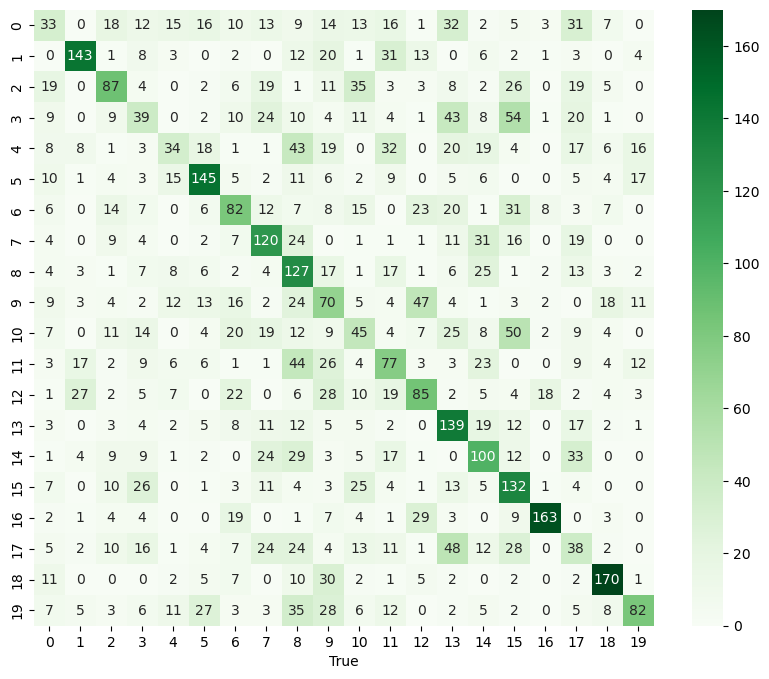

In [35]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.savefig('DT FE Heatmap PostP.png')
plt.show()

In [19]:
dtp.score(X_test, y_test)

0.3822

### Model Evaluation

In [20]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

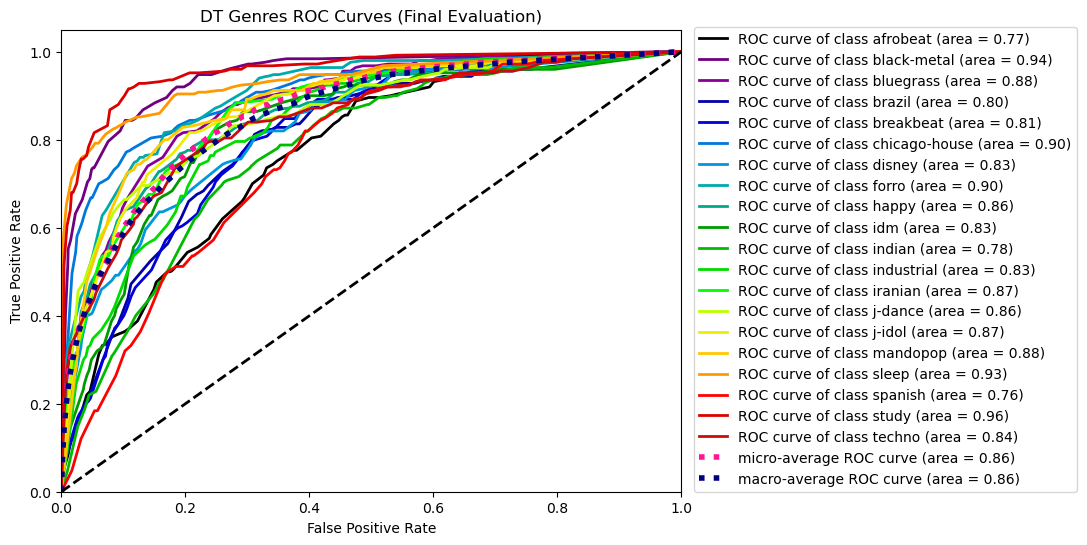

In [22]:
plot_roc(y_test, dtp.predict_proba(X_test), figsize=(8,6))
plt.title('DT Genres ROC Curves (Final Evaluation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

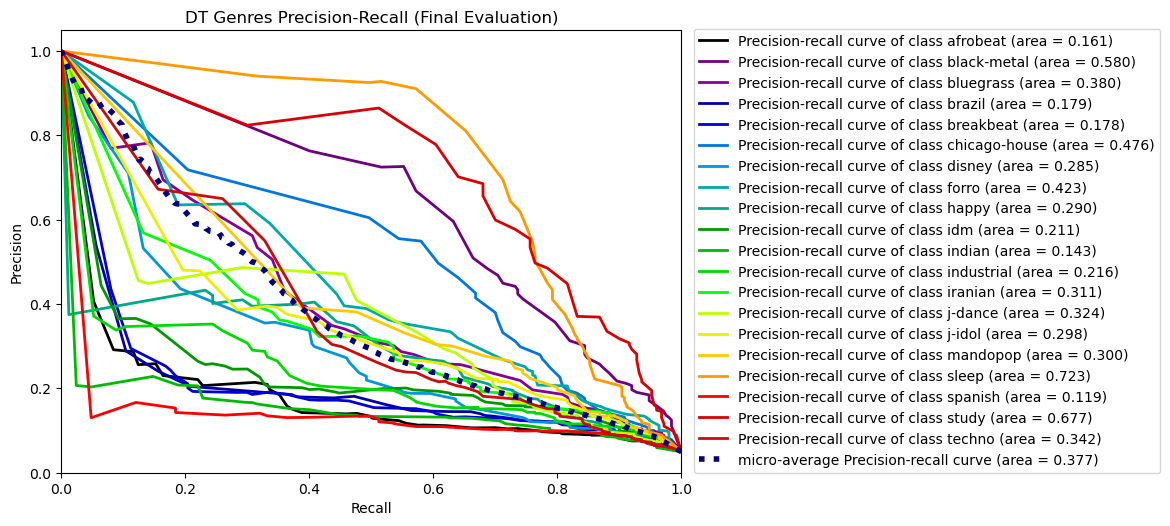

In [23]:
plot_precision_recall(y_test, dtp.predict_proba(X_test), figsize=(8,5.75))
plt.title('DT Genres Precision-Recall (Final Evaluation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

### Feature Importance

In [24]:
zipped = zip(attributes, dtp.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

danceability 0.18442207124371054
acousticness 0.15460644180717187
loudness 0.1405002823211796
valence 0.12007989147929343
instrumentalness 0.1200240746037328
energy 0.09713111443074031
tempo 0.09527393064437863
speechiness 0.07521614210182699
liveness 0.012746051367965798
key 0.0


In [25]:
dtp.feature_importances_

array([0.18442207, 0.09527393, 0.09713111, 0.14050028, 0.15460644,
       0.07521614, 0.12002407, 0.01274605, 0.12007989, 0.        ])

In [26]:
dtp.get_params()

{'ccp_alpha': 0.0005,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [27]:
dtp.predict_proba(X_test)

array([[0.0257732 , 0.00515464, 0.02061856, ..., 0.11340206, 0.        ,
        0.0257732 ],
       [0.03846154, 0.03846154, 0.05128205, ..., 0.01282051, 0.16666667,
        0.02564103],
       [0.07569721, 0.03585657, 0.00796813, ..., 0.07171315, 0.        ,
        0.03187251],
       ...,
       [0.02631579, 0.03289474, 0.00657895, ..., 0.02631579, 0.        ,
        0.02631579],
       [0.        , 0.79518072, 0.        , ..., 0.00963855, 0.        ,
        0.00240964],
       [0.00280899, 0.01123596, 0.        , ..., 0.00280899, 0.        ,
        0.06179775]])

In [28]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.3822

In [29]:
precision_score(y_test,y_test_pred, average='macro')

0.39016183364175955

In [30]:
feature_importance = pd.DataFrame(dtp.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

,0
danceability,0.184422
acousticness,0.154606
loudness,0.140500
valence,0.120080
instrumentalness,0.120024
energy,0.097131
tempo,0.095274
speechiness,0.075216
liveness,0.012746
key,0.000000


<Axes: title={'center': 'Feature importance (Genres)'}>

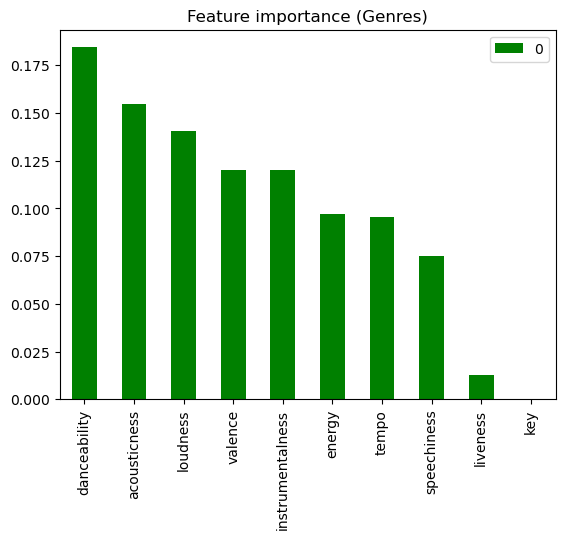

In [31]:
feature_importance.plot(kind='bar', color='green', title='Feature importance (Genres)')

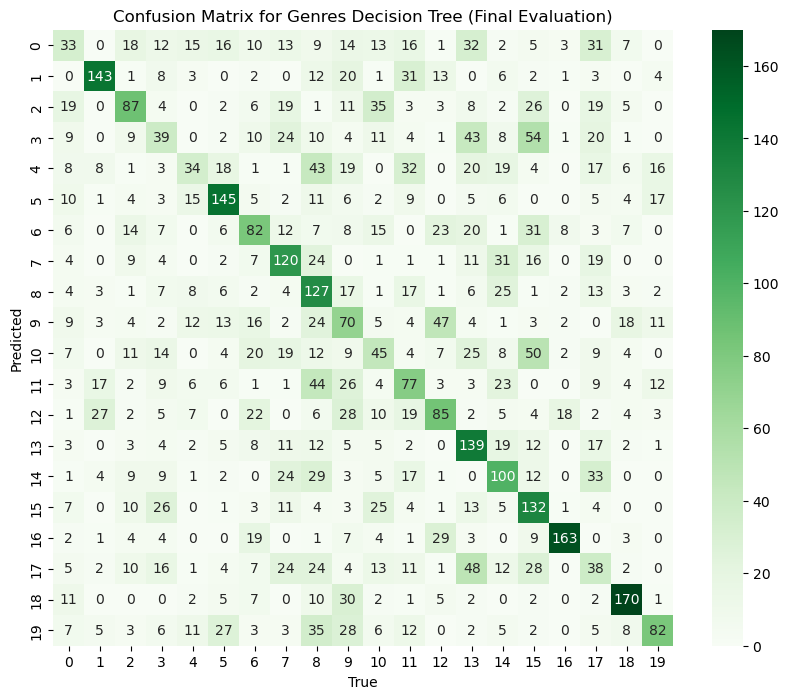

In [34]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix for Genres Decision Tree (Final Evaluation)')
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()